In [1]:
import pandas as pd
import random as rnd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [105]:
#ML tools:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Construction DB creation for ML training:

In [3]:
np.random.normal(810,275,1)

array([ 777.04853967])

In [4]:
#Creating Dataframes from Dicts using random normal distribution.
#Note that new observations are batch-generated in controlled packs of typical case studies.
#Each centre of the distribution and each standard deviation are controlled and 
#assigned intentionally by a construction manager (the one who is scripting). 
#We trust this expert data to furher enrich the DataBase rather than adding innecessary noise.

cons0_aisl=pd.DataFrame.from_dict({'modul_price':np.random.normal(910,375,600), 
                        "weeks_delay":np.random.normal(7,22,600),
                        "weeks_duration":np.random.normal(30,20,600),
                        "built_area": np.random.normal(125,350,600)})

cons1_med=pd.DataFrame.from_dict({'modul_price':np.random.normal(750,220,1000), 
                        "weeks_delay":np.random.normal(36,20,1000),
                        "weeks_duration":np.random.normal(65,31,1000),
                        "built_area": np.random.normal(5800,3300,1000)})

cons2_peq=pd.DataFrame.from_dict({'modul_price':np.random.normal(810,275,500), 
                        "weeks_delay":np.random.normal(19,11,500),
                        "weeks_duration":np.random.normal(65,31,500),
                        "built_area": np.random.normal(3800,2029,500)})

cons3_gran=pd.DataFrame.from_dict({'modul_price':np.random.normal(600,220,200), 
                        "weeks_delay":np.random.normal(10,15,200),
                        "weeks_duration":np.random.normal(63,20,200),
                        "built_area": np.random.normal(8100,2200,200)})

cons4_gran=pd.DataFrame.from_dict({'modul_price':np.random.normal(720,193,1200), 
                        "weeks_delay":np.random.normal(23,10,1200),
                        "weeks_duration":np.random.normal(62,20,1200),
                        "built_area": np.random.normal(13300,5081,1200)})

const_tot = pd.concat([cons0_aisl,cons1_med, cons2_peq, cons3_gran,cons4_gran])

#Let's sweep away negative values and other absurd values.
const_tot = const_tot[(const_tot["weeks_duration"]>13 )& (const_tot["built_area"]>50)                       
                      & (const_tot['modul_price']>181) & (const_tot["weeks_delay"]>=0)]

#Weeks to integer type:
const_tot.weeks_duration= const_tot.weeks_duration.astype(int)
const_tot.weeks_delay= const_tot.weeks_delay.astype(int)

#reset index:
const_tot=const_tot.reset_index().drop("index",axis=1)
                                  
const_tot.head(7)


,built_area,modul_price,weeks_delay,weeks_duration
0,273.690884,1307.768234,33,17
1,437.095245,402.626291,14,27
2,920.531833,660.322560,31,42
3,685.842075,264.561076,30,13
4,381.190063,557.619817,31,49
5,435.770529,404.372728,13,38
6,158.843488,788.449770,1,56


In [5]:
#Asigning building typologies to a new column with an expert randomizer:

## Expert randomizer:

rand90=[True,True,True,True,True,True,True,True,True,False]
rand80=[True,True,True,True,True,True,True,True,False,False]
rand60=[True,True,True,True,True,True,False,False,False,False]
rand10=[True,False,False,False,False,False,False,False,False,False]

edif=["DETACHED" if (n <250) and (True in rnd.sample(rand90,1)) else      
      "DETACHED" if (250<n<450) and (True in rnd.sample(rand80,1)) else
      "COLLECTIVE" if (450<n<3200) and (True in rnd.sample(rand60,1)) else      
      "COMMERCIAL" if (7000<n<35000) and (True in rnd.sample(rand10,1)) else
      "COMMERCIAL" if (4000<n<15000) and (True in rnd.sample(rand10,1)) else
      "COLLECTIVE" if (3200<n<25000) and (True in rnd.sample(rand60,1)) else
      "OTHERS"     
      for n in const_tot["built_area"]]

## Aplicación al DF:    
const_tot["typology"]=pd.Series(edif)
const_tot["typology"].value_counts()

COLLECTIVE    1409
OTHERS         974
COMMERCIAL     302
DETACHED       108
Name: typology, dtype: int64

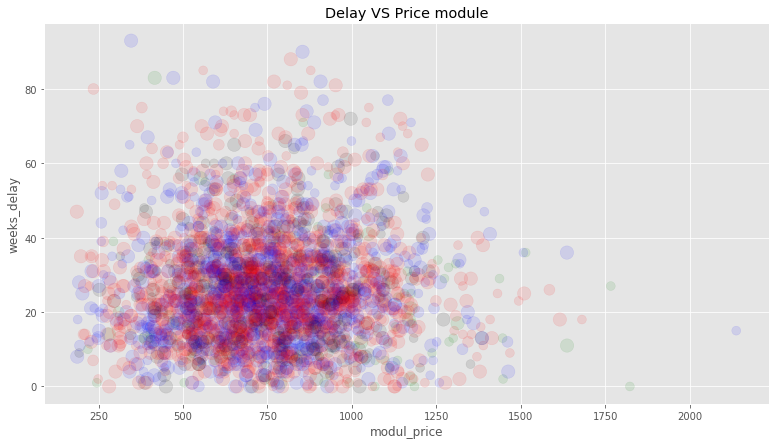

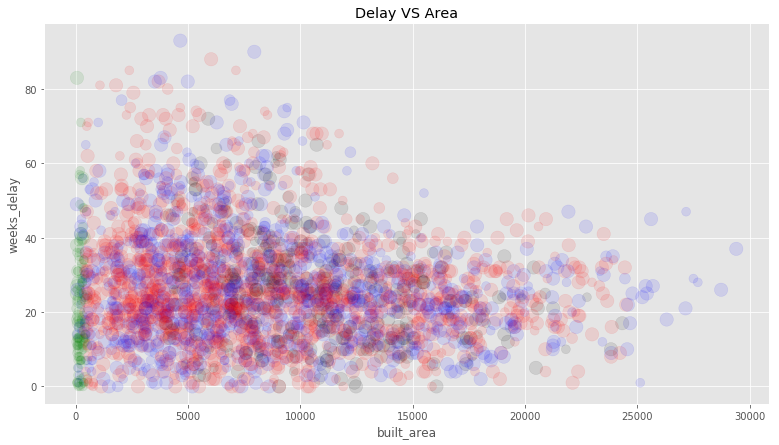

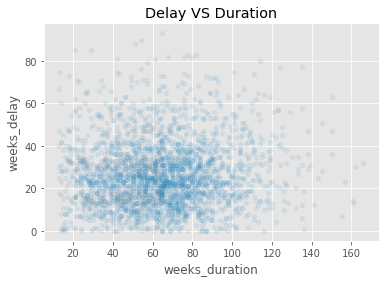

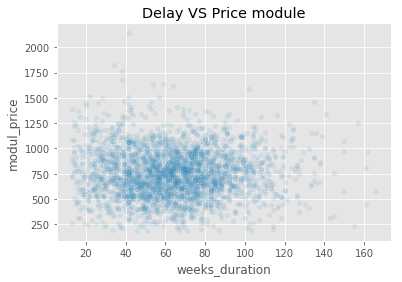

In [6]:
#Creamos una lista de colores según las tipologías de la columna "tipolog".

color= ['black' if l == "COMMERCIAL" else 'blue' if l == "OTHERS" else 'green' if l== "DETACHED" 
        else 'red' for l in const_tot["typology"]]

#Creating a list to assign size of the plots to a variable. 
#This case we will use the construction duration.
size= [20 if n < 13 else 80 if n <50 else 180 if n <100 else 120
         for n in const_tot["weeks_duration"]]

#Scatterplotting to see the distribution:
const_tot.plot.scatter(x='modul_price', y="weeks_delay", title="Delay VS Price module",
                       color=color, alpha=0.1,figsize=(13, 7),s=size)
const_tot.plot.scatter(x="built_area", y="weeks_delay", title="Delay VS Area",
                       color=color, alpha=0.1,figsize=(13, 7),s=size)
const_tot.plot.scatter(x="weeks_duration", y="weeks_delay", title="Delay VS Duration", alpha=0.1)
const_tot.plot.scatter(x="weeks_duration", y='modul_price', title="Delay VS Price module", alpha=0.1)

## Visualizing the Data:

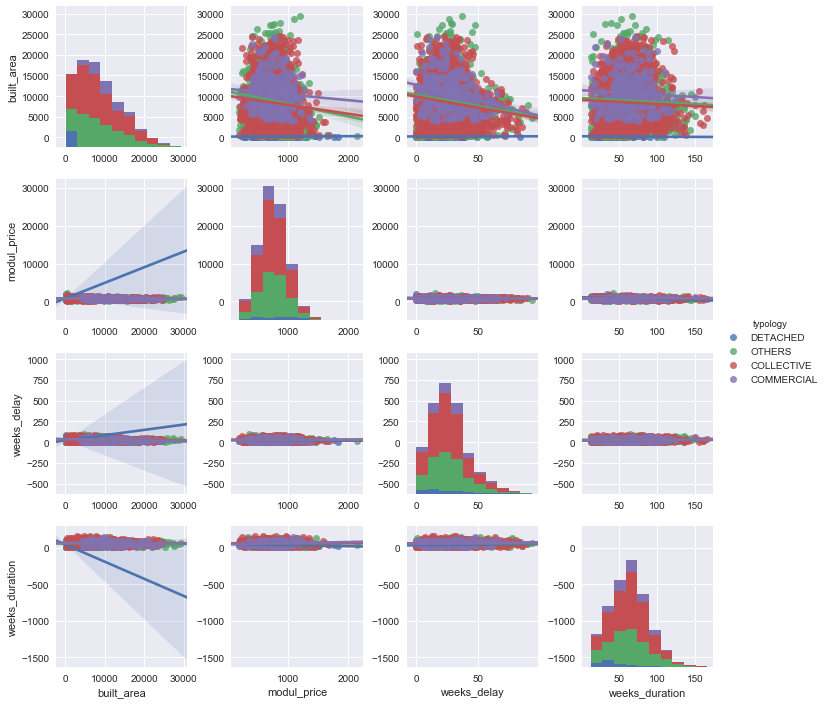

In [7]:
import seaborn as sns
sns.set()
sns.pairplot(const_tot, hue="typology",kind="reg")

In [8]:
list(np.unique(const_tot["typology"]))

['COLLECTIVE', 'COMMERCIAL', 'DETACHED', 'OTHERS']

In [9]:
#Let's see if everything is OK:
print(const_tot[["typology", "built_area"]].groupby(["typology"], as_index=False).max())
print(const_tot[["typology", "built_area"]].groupby(["typology"], as_index=False).describe())
print(const_tot.sample(10))

     typology    built_area
0  COLLECTIVE  24503.736845
1  COMMERCIAL  24328.975733
2    DETACHED    446.345600
3      OTHERS  29402.635922
  built_area                                                       \
       count          mean          std          min          25%   
0     1409.0   8443.344341  5522.759731   450.893491  4064.425803   
1      302.0  10727.333684  4071.826153  4022.999758  7936.350044   
2      108.0    218.348622   118.160459    52.003674   115.107028   
3      974.0   8880.802810  5892.611563    52.171168  4241.919885   

                                             
            50%           75%           max  
0   7253.552757  11963.052030  24503.736845  
1  10122.961018  13224.504800  24328.975733  
2    193.211204    313.352828    446.345600  
3   7731.567017  12603.866037  29402.635922  
        built_area  modul_price  weeks_delay  weeks_duration    typology
1756   6940.473808   415.553052           20              50  COMMERCIAL
2362  23445.383744   55

In [10]:
#One Hot Encoding (OHE) building typologies for better future processing:

detached=[1 if n =="DETACHED" else 0 for n in const_tot["typology"]]
collective=[1 if n =="COLLECTIVE" else 0 for n in const_tot["typology"]]
commercial=[1 if n =="COMMERCIAL" else 0 for n in const_tot["typology"]]
others=[1 if n =="OTHERS" else 0 for n in const_tot["typology"]]

const_OHE = pd.DataFrame()
const_OHE["DETACHED"]  = pd.Series(detached)
const_OHE["COLLECTIVE"] = pd.Series(collective)
const_OHE["COMMERCIAL"] = pd.Series(commercial)
const_OHE["OTHERS"]= pd.Series(others)

#One Hot Encoding (OHE) delays depending of the delays and the duration, assigning a threshold based in 
# the minimum proportion of 0.15 times the duration to consider it a TRUE delay:

def divide(x):
    return np.divide(x['weeks_delay'],x['weeks_duration'])

delays = pd.DataFrame()
delays = const_tot.apply(divide,axis=1)
const_OHE["DELAYED"] = [1 if n > 0.2  else 0 for n in delays]
const_OHE.sample(5)

,DETACHED,COLLECTIVE,COMMERCIAL,OTHERS,DELAYED
2245,0,0,1,0,1
1960,0,1,0,0,1
387,0,0,0,1,1
2033,0,0,0,1,0
2217,0,1,0,0,1


In [11]:
#Checking de coherence of the new one hot encoded DF.
check_df = pd.concat([const_tot,const_OHE],axis=1)
check_df.sample(5)

,built_area,modul_price,weeks_delay,weeks_duration,typology,DETACHED,COLLECTIVE,COMMERCIAL,OTHERS,DELAYED
2578,18844.433537,973.295681,24,79,COMMERCIAL,0,0,1,0,1
2522,9090.370787,515.978710,16,71,COLLECTIVE,0,1,0,0,1
311,2045.096170,1106.453853,77,124,OTHERS,0,0,0,1,1
1136,1866.003833,1208.852703,37,104,OTHERS,0,0,0,1,1
925,7703.502678,559.354438,46,37,OTHERS,0,0,0,1,1


In [12]:
#Concatenating main DF with the one hot encoded DF and dropping redundant columns:
prepared_const = const_tot.drop(['typology','weeks_delay'],axis=1)
prepared_const = pd.concat([prepared_const,const_OHE],axis=1)

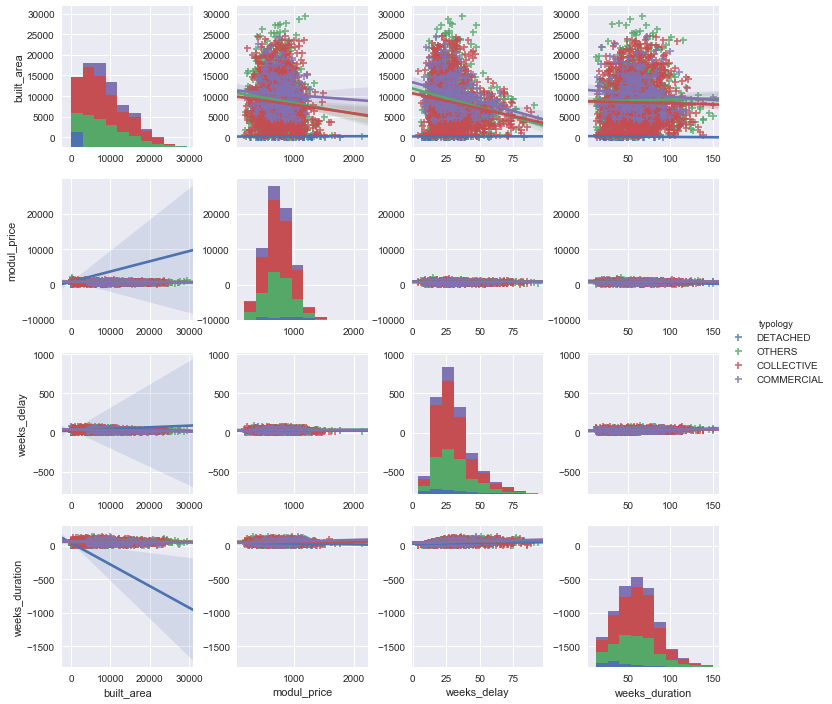

In [13]:
#Preview of the Data Set, looking for correlations. Let's filter the DF with the bigger grop of the target, 
#observations DELAYED = True.
preview_const = pd.concat([const_tot,const_OHE['DELAYED']],axis=1)
import seaborn as sns
sns.set()
sns.pairplot(const_tot[preview_const['DELAYED'] == 1], hue="typology",markers="+",kind="reg")

## Feature scaling

In [97]:
#Feature Scaling:
scaler = preprocessing.MinMaxScaler()

scaled_const = pd.DataFrame(scaler.fit_transform(
    prepared_const[['built_area', 'modul_price','weeks_duration']]),
                            columns= ['built_area', 'modul_price','weeks_duration'])
prepared_const = pd.concat([scaled_const,prepared_const.drop(['built_area', 'modul_price','weeks_duration'],axis=1)],
                        axis=1)
prepared_const.sample(5)

,built_area,modul_price,weeks_duration,DETACHED,COLLECTIVE,COMMERCIAL,OTHERS,DELAYED
1206,0.177582,0.436249,0.313725,0,1,0,0,1
2146,0.241184,0.166379,0.235294,0,1,0,0,1
805,0.362177,0.308209,0.477124,0,1,0,0,1
1767,0.590746,0.468588,0.359477,0,0,0,1,0
1137,0.130040,0.489501,0.444444,0,1,0,0,1


In [89]:
#Let's split the dataset and train the model:
y = prepared_const['DELAYED']
X = prepared_const.loc[:,'built_area':'OTHERS']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=1,stratify=y)

In [90]:
y[y_test.index.values].head(5)

146     1
942     1
1708    1
1870    1
1126    1
Name: DELAYED, dtype: int64

## Test and combination of ML models:
Due to the impossibility for the client (construction managers) most of the times, to manipulate every parameter in the construction project, it is useless to recomend global optimal parameters. So the nature of this problem force us to focus in local optima rather than on globals. So, we have to refine the models to avoid overfitting, but taking care of not "softening" the models too much. With the confussion matrix in mind, so we are open to have a model with many False Positives (of potentially delayed construction projects but finally not delayed). This way we won't take the risk of regularizing the models too much nd loosing valuable information.

In [104]:
#K-NEIGHBORS:
knn =KNeighborsClassifier(n_neighbors=10)
knn.fit(X,y)
y_pred_kn = knn.predict(X_test)
print("KNEIGHBORS REGRESSION MODEL: ")
print("Basic scoring: " +str(knn.score(X_test,y_test)))
print("Normalized accuracy: " +str(accuracy_score(y_test,y_pred_kn)))
print("Net accuracy: " +str(accuracy_score(y_test,y_pred_kn, normalize = False)) + 
      " over " + str(y_test.size) + " samples.")

KNEIGHBORS REGRESSION MODEL: 
Basic scoring: 0.830548926014
Normalized accuracy: 0.830548926014
Net accuracy: 348 over 419 samples.


In [92]:
#Single prediction:
prediction = knn.predict([[7966.539337 ,952.116206, 71 ,0 , 1,0,0]])
prediction

array([1], dtype=int64)

In [93]:
#LOGISTIC:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lg = logreg.predict(X_test)
print("LOGISTIC REGRESSION MODEL: ")
print("Basic scoring: " +str(logreg.score(X_test,y_test)))
print("Normalized accuracy: " +str(accuracy_score(y_test,y_pred_lg)))
print("Net accuracy: " +str(accuracy_score(y_test,y_pred_lg, normalize = False)) + 
      " over " + str(y_test.size) + " samples.")


LOGISTIC REGRESSION MODEL: 
Basic scoring: 0.8138424821
Normalized accuracy: 0.8138424821
Net accuracy: 341 over 419 samples.


In [95]:
#RANDOM FOREST CLASSIF:
ranfor = RandomForestClassifier(max_depth=2, random_state=0)
ranfor.fit(X, y)
y_pred_rf = ranfor.predict(X_test)
print("RANDOM FOREST MODEL: ")
print("Basic scoring: " +str(ranfor.score(X_test,y_test)))
print("Normalized accuracy: " +str(accuracy_score(y_test,y_pred_rf)))
print("Net accuracy: " +str(accuracy_score(y_test,y_pred_rf, normalize = False)) + 
      " over " + str(y_test.size) + " samples.")

RANDOM FOREST MODEL: 
Basic scoring: 0.8138424821
Normalized accuracy: 0.8138424821
Net accuracy: 341 over 419 samples.


# Evaluating ML tools performance and combination:
As we will see, the performance and predictions of random forest and logistic regression tools are similar, probably because of the scarcity of samples. We will combine these tools only to score the confidence of the prediction, as they will predict the same labels most of the times.

In [96]:
#Coincidence between models:
print("LOGIST VS RANDFOR: " +str(accuracy_score(y_pred_lg,y_pred_rf)))
print("LOGIST VS K-NEIGH: " +str(accuracy_score(y_pred_lg,y_pred_kn)))
print("RANDFOR VS K-NEIGH: " +str(accuracy_score(y_pred_rf,y_pred_kn)))

LOGIST VS RANDFOR: 0.990453460621
LOGIST VS K-NEIGH: 0.935560859189
RANDFOR VS K-NEIGH: 0.935560859189
